In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [2]:
csfont = {'fontname':'Arial'}


In [3]:
path_to_file = "/Users/aditgupta/Google Drive/Research/T2D/all_data.csv"

In [4]:
df = pd.read_csv(path_to_file, header=None, index_col=0)
df2 = df.rename(columns={1:'gene'}, inplace=False)


In [5]:
pd.set_option('display.max_rows', 500)


In [6]:
df2.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,,,,,,,,,,,,,
2,gene,fast_glu_anal,hr_glu_anal,ln_fast_ins_anal,ln_hr_ins_anal,ldl_anal,tchol_anal,hdl_anal,ln_tg_anal,sbp_anal,dbp_anal,ln_creat_anal,ln_bmi_anal
2,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
2,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
2,IFNG,0.88302,0.10996,0.57891,0.45358,0.60859,0.20033,0.34672,0.4963,0.093361,0.025266,0.10684,0.044815


In [7]:
path_to_file_2 = "/Users/aditgupta/Google Drive/Research/T2D/gluc_low.csv"

In [8]:
df3 = pd.read_csv(path_to_file_2, header=None, index_col=0)

In [9]:
df3
df4 = df3.rename(columns={1:'gene'}, inplace=False)


In [10]:
df6 = df4.dropna()
len(df6['gene'].unique())

73

In [11]:
df5 = pd.merge(df2, df6, on='gene', how='inner')
df5.head()

,gene,2,3,4,5,6,7,8,9,10,11,12,13
0,KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
1,AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
2,NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
3,ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
4,NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563


In [12]:
df7 = df5.dropna(subset = ['gene'])
wanted = df7['gene'].unique()

In [13]:
string_to_write = "\n".join(wanted)
with open("wanted_20.txt", "w") as f:
    f.write(string_to_write)

In [14]:
df5 = df5.set_index("gene")

In [15]:
df5.head()

,2,3,4,5,6,7,8,9,10,11,12,13
gene,,,,,,,,,,,,
KIT,0.21544,0.69292,0.056371,0.51867,0.40683,0.079328,0.51203,0.30325,0.07714,0.19561,0.10575,0.24253
AR,0.20797,0.31025,0.10498,0.37316,0.3803,0.39405,0.16005,0.19622,0.33511,0.36426,0.043911,0.35625
NR3C1,0.055308,0.40319,0.17936,0.65621,0.27421,0.61855,0.46186,0.56602,0.057787,0.12611,0.0017237,0.07054
ABCC8,0.21002,0.32226,0.3885,0.50763,0.33093,0.17989,0.25546,0.0090463,0.22065,0.30258,0.23117,0.14762
NR1I2,0.19452,0.19478,0.030496,0.50151,0.23753,0.094493,0.48482,0.32032,0.26014,0.094558,0.013724,0.10563


In [16]:
df5 = df5.astype(np.float32)

In [17]:
bmi_gluc_synthetic = np.array([0.00079371,0.0038529, 0.0038692, 0.011781, 0.016211, 0.020746,0.023691,0.025932,0.031883,0.03346,0.034047,0.042854,0.045173,0.050497,0.050799, 0.052086,0.052312,0.057919,0.064807,0.071449,0.076924,0.077906,0.082264,0.089912,0.091958,0.1219,0.12432,0.13278,0.1383,0.14031,0.14055,0.14078,0.1431,0.14611,0.14673,0.14708,0.16128,0.16421,0.16679,0.16906,0.17604,0.1802,0.18065,0.18321,0.18527,0.20456,0.20575,0.20709,0.21287,0.21325,0.21722,0.21781,0.23288,0.23341,0.23601,0.2409,0.24554,0.24683,0.25484,0.25776,0.27397,0.28105,0.29017,0.29022,0.29842,0.29855,0.30654,0.31335,0.37021,0.39238,0.39683,0.40993,0.41709,0.42105, 0.42813,0.43352,0.46393,0.47006,0.49413,0.50238,0.51816,0.54151,0.5448,0.55668,0.56105,0.56837,0.58265,0.58482,0.58714, 0.65654, 0.748320,.87922])

In [18]:
fast_insulin_gluc_synthetic = np.array([0.001082,0.0016243,0.0032657,0.00684,0.020092,0.020111,0.025561,0.027516,0.03451,0.039758,0.039967,0.040977,0.043761,0.045895,0.046694,0.059579,0.062997,0.064848,0.066645,0.075656,0.079519,0.081533,0.082935,0.085064,0.092022,0.095618,0.1207,0.13698,0.14036,0.14585,0.15562,0.15628,0.15647,0.16976,0.17064,0.17182,0.17717,0.18694,0.18819,0.19511,0.20046,0.20225,0.21469,0.22138,0.22344,0.23146,0.2511,0.25628,0.26565,0.2745,0.28223,0.28629,0.28879,0.31492,0.31855,0.32806,0.33531,0.34331,0.3453,0.34985,0.35149,0.35653,0.36748,0.37015,0.37892,0.38481,0.39798,0.44337,0.44639,0.45117,0.45477,0.45665,0.49636,0.51422,0.52191,0.53849,0.54477,0.54534,0.54534,0.58669,0.59918,0.6225,0.64193,0.64866,0.68637,0.68832,0.69885,0.79252,0.79313,0.83817,0.87012,0.92403])

In [19]:
dbp_gluc_synthetic = ([0.000000022889,	0.00004608,	0.000066945,	0.0002258,	0.0034237,	0.0061159,	0.0086051,	0.012321,	0.01724,	0.017506,	0.017629,	0.021403,	0.022644,	0.026643,	0.027507,	0.03064,	0.032194,	0.037891,	0.040311,	0.042834,	0.04507,	0.056788,	0.062628,	0.066,	0.070895,	0.078396,	0.079644,	0.080668,	0.084587,	0.094796,	0.1066,	0.12505,	0.12693,	0.13653,	0.13683,	0.1392,	0.14274,	0.14772,	0.14832,	0.15009,	0.1518,	0.15524,	0.15786,	0.15886,	0.16933,	0.17196,	0.2014,	0.21268,	0.21477,	0.21887,0.23124,	0.2318,	0.24528,	0.26021,	0.30421,	0.31021,	0.32456,	0.32985,	0.3318,	0.3325,	0.34769,	0.377,	0.40029,	0.41799,	0.42065,	0.43235,	0.43409,	0.43653,	0.44024,	0.44377,	0.44631,	0.4549,	0.46191,	0.50597,	0.50714,	0.51038,	0.51911,	0.53315,	0.55076,	0.55447,	0.59437,	0.59619,	0.62384,	0.64004,	0.64375,	0.64566,	0.69843,	0.71624,	0.81511,	0.81722,	0.83469])

In [20]:
ldl_gluc_synthetic =np.array([0.00002271,	0.0019724,	0.005225,	0.0070993,	0.013821,	0.017698,	0.03205,	0.03318,	0.034652,	0.037375,	0.037776,	0.04262,	0.045844,0.050506,0.096049,0.098175,0.10914,0.11107,0.16091,0.23101,0.23298,0.23688,0.25183,	0.2586,	0.25892,	0.26087,	0.26893,	0.27817,	0.28713,	0.29328,	0.29358,	0.29782,	0.32235,	0.34152,	0.35174,	0.39349,	0.39484,	0.40354,	0.41942,	0.42151,	0.43616,	0.45121,	0.45228,	0.47121,	0.47167,	0.49364,	0.5025,	0.50697,	0.51358,	0.54785,	0.59367,	0.60314,	0.62833,	0.63492,	0.637,	0.64312,	0.66987,	0.67492,	0.68715,	0.6919,	0.72561,	0.74419,	0.75256,0.12762,	0.1279,	0.13506,	0.13528,	0.14069,	0.1432,	0.14763,	0.14808,0.16969,	0.1757,	0.17892,	0.18104,	0.18112,	0.18771,	0.1918,	0.19445,	0.19961,	0.20277,	0.20388,	0.21006])

In [21]:
tchol_gluc_synthetic =np.array([0.023028,	0.023683,	0.026275,	0.031553,	0.032482,	0.035409,	0.038646,	0.041231,	0.046382,	0.049498,	0.054506,	0.055462,	0.097696,	0.10244,	0.10808,	0.11001,	0.11381,	0.1142,	0.12707,	0.1356,	0.14404,	0.14808,	0.15112,	0.15915,	0.16164,	0.16975,	0.17258,	0.17305,	0.17337,	0.17342,	0.17353,	0.17852,	0.18006,	0.18441,	0.18741,	0.19407,	0.19647,	0.20878,	0.21196,	0.21308,	0.21341,	0.22538,	0.22932,	0.23079,	0.2417,	0.24209,	0.25252,	0.25433,	0.27156,	0.27684,	0.27796,	0.28458,	0.29853,	0.30725,	0.31642,	0.31672,	0.32243,	0.33219,	0.34027,	0.34237,	0.34865,	0.35036,	0.35198,	0.35441,	0.36353,	0.38926,	0.3925,	0.39485,	0.41315,	0.41611,	0.42713,	0.43154,	0.43228,	0.43302,	0.43525,	0.43619,	0.43739,	0.44447,	0.44666,	0.47071,	0.47168,	0.47193,	0.47544,	0.47868,	0.48809,	0.49194,	0.50818,	0.50962,	0.58622,	0.60451,	0.73482,	0.85624])

In [22]:
hdl_gluc_synthetic =np.array([0.098361,	0.066153,	0.066483,	0.73544,	0.14936,	0.19958,	0.12333,	0.11651,	0.29146,	0.069835,	0.035409,	0.25605,	0.42427,	0.44147,	0.036447,	0.26571,	0.10014,	0.091901,	0.071734,	0.38826,	0.23722,	0.48133,	0.33148,	0.65326,	0.36712,	0.85703,	0.12853,	0.2985,	0.038334,	0.46802,	0.85984,	0.0084627,	0.10472,	0.39528,	0.014911,	0.50841,	0.031439,	0.52614,	0.24461,	0.071374,	0.20604,	0.23969,	0.0060076,	0.01476,	0.017621,	0.32182,	0.27989,	0.40879,	0.18327,	0.57533,	0.12175,	0.4216,	0.31119,	0.13936,	0.16718,	0.034834,	0.1032,	0.44723,	0.18294,	0.040425,	0.23195,	0.097182,	0.21658,	0.30095,	0.22983,	0.08572,	0.075104,	0.77831,	0.041199,	0.28124,	0.071699,	0.60126,	0.14164,	0.79716,	0.00035122,	0.31502,	0.04301,	0.49415,	0.093162,	0.015632,	0.31945,	0.097043,	0.34465,	0.013148,	0.37818,	0.62219,	0.041031,	0.61567,	0.3438,	0.6198,	0.47903,	0.25406])

In [23]:
tg_gluc_synthetic =np.array([0.30484,	0.52646,	0.15841,	0.31778,	0.61474,	0.29907,	0.12333,	0.11651,	0.44293,	0.0062816,	0.13047,	0.20328,	0.31427,	0.38884,	0.53637,	0.47601,	0.10014,	0.13773,	0.17914,	0.2951,	0.23722,	0.28185,	0.1559,	0.26536,	0.47147,	0.44846,	0.5624,	0.16193,	0.23991,	0.346,	0.17611,	0.090376,	0.23889,	0.74921,	0.18096,	0.24905,	0.017779,	0.18609,	0.061298,	0.6375,	0.045011,	0.49151,	0.032145,	0.18881,	0.016281,	0.3519,	0.43979,	0.12698,	0.52938,	0.048974,	0.35632,	0.3083,	0.11258,	0.10979,	0.17266,	0.20303,	0.13987,	0.26533,	0.10774,	0.1372,	0.81168,	0.54937,	0.13656,	0.068885,	0.060889,	0.41304,	0.32103,	0.22172,	0.39247,	0.28603,	0.23236,	0.71898,	0.11357,	0.10046,	0.073946,	0.0070993,	0.42151,	0.090479,	0.14808,	0.11481,	0.38415,	0.0028781,	0.086141,	0.24907,	0.21421,	0.057202,	0.02279,	0.30149,	0.16871,	0.044359,	0.72324,	0.13307])

In [24]:
sbp_gluc_synthetic =np.array([0.048881,	0.15795,	0.22332,	0.10085,	0.35395,	0.33158,	0.57503,	0.37856,	0.60715,	0.0062816,	0.13047,	0.63685,	0.17502,	0.55199,	0.035711,	0.17442,	0.2061,	0.67278,	0.17914,	0.2951,	0.045375,	0.28185,	0.1559,	0.26536,	0.015295,	0.4998,	0.063235,	0.14668,	0.071767,	0.16805,	0.51615,	0.014683,	0.23869,	0.9229,	0.3931,	0.48435,	0.21508,	0.12496,	0.18197,	0.1882,	0.14756,	0.056146,	0.18533,	0.16307,	0.051822,	0.38215,	0.38433,	0.38384,	0.51849,	0.050372,	0.17914,	0.10074,	0.10121,	0.074815,	0.01725,	0.26596,	0.082664,	0.27516,	0.087359,	0.00090579,	0.093278,	0.54344,	0.037843,	0.17183,	0.0019633,	0.21317,	0.0041007,	0.49037,	0.0019146,	0.19775,	0.38966,	0.15525,	0.035243,	0.37852,	0.14316,	0.25654,	0.29893,	0.40836,	0.39502,	0.61305,	0.28117,	0.10515,	0.043879,	0.036276,	0.31775,	0.13476,	0.44591,	0.084892,	0.1913,	0.47918,	0.13747,	0.13968,])

In [25]:
creat_gluc_synthetic =np.array([0.084587,	0.079644,	0.26021,	0.1066,	0.022644,	0.16933,	0.32985,	0.69843,	0.83469,	0.1392,	0.51911,	0.2318,	0.0002258,	0.32456,	0.59437,	0.43235,	0.50597,	0.30421,	0.000066945,	0.4549,	0.078396,	0.14772,	0.2014,	0.017506,	0.42065,	0.59619,	0.01724,	0.46191,	0.012321,	0.3318,	0.51038,	0.24528,	0.027507,	0.81511,	0.64566,	0.00004608,	0.34769,	0.03064,	0.056788,	0.23124,	0.21887,	0.15524,	0.066,	0.040311,	0.43653,	0.17196,	0.55447,	0.50714,	0.3325,	0.14832,	0.377,	0.44024,	0.44377,	0.0061159,	0.44631,	0.1518,	0.052694,	0.53315,	0.037891,	0.032194,	0.64375,	0.13653,	0.15786,	0.55076,	0.021403,	0.033125,	0.62384,	0.81722,	0.14274,	0.21477,	0.042834,	0.41799,	0.000000022889,	0.15009,	0.070895,	0.13683,	0.080668,	0.12693,	0.71624,	0.64004,	0.43409,	0.094796,	0.40029,	0.12505,	0.04507,	0.062628,	0.017629,	0.15886,	0.026643,	0.21268,	0.0086051,	0.31021])

In [26]:
hr_gluc_synthetic = np.array([0.59476,	0.56512,	0.0086538,	0.86128,	0.21568,	0.025718,	0.24663,	0.015089,	0.49183,	0.26939,	0.48565,	0.39111,	0.11891,	0.21628,	0.11663,	0.10078,	0.36945,	0.38753,	0.36354,	0.4958,	0.012229,	0.44837,	0.35618,	0.29242,	0.36482,	0.71178,	0.32023,	0.16788,	0.15846,	0.18862,	0.16572,	0.25867,	0.32463,	0.32947,	0.39119,	0.33032,	0.2295,	0.38766,	0.61732,	0.020444,	0.21209,	0.65131,	0.097339,	0.22758,	0.68531,	0.35091,	0.70532,	0.23593,	0.25229,	0.50297,	0.0096052,	0.01457,	0.0049673,	0.63597,	0.04075,	0.12664,	0.17032,	0.91281,	0.59688,	0.2071,	0.60585,	0.75725,	0.48368,	0.63592,	0.34985,	0.53849,	0.043761,	0.025561,	0.51422,	0.23469,	0.62664,	0.47856,	0.29674,	0.3098,	0.22596,	0.15556,	0.016035,	0.10192,	0.43323,	0.1491,	0.34485,	0.49222,	0.38403,	0.27897,	0.64731,	0.41591,	0.13736,	0.17717,	0.33531,	0.44337,	0.14347,	0.082935])


In [27]:
#all_sorted_genes is a list of dataframes
all_sorted_genes = []
for column in df5.columns:
    sorted_genes = pd.DataFrame(df5[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_genes.append(sorted_genes)


In [28]:
all_sorted_genes[3]

,5,rank,rank_percentile
gene,,,
SSTR2,0.022427,1,0.984375
ATP4A,0.028427,2,0.968750
SQLE,0.031819,3,0.953125
ACHE,0.068187,4,0.937500
CHRM1,0.082554,5,0.921875
BDKRB1,0.102900,6,0.906250
CACNG1,0.104920,7,0.890625
ADRA2A,0.157650,8,0.875000
PTGS1,0.159240,9,0.859375


### ''all_sorted_genes[0][2].values'' --> Get all values in second column of first dataframe

In [29]:
all_sorted_genes[4][6].values

array([0.0024558, 0.0026977, 0.0081709, 0.0082299, 0.0087083, 0.0147   ,
       0.052856 , 0.053216 , 0.061536 , 0.068639 , 0.071145 , 0.07263  ,
       0.073071 , 0.079568 , 0.081828 , 0.090614 , 0.10482  , 0.11103  ,
       0.11472  , 0.13024  , 0.13916  , 0.16013  , 0.17531  , 0.17958  ,
       0.18269  , 0.18956  , 0.19405  , 0.2149   , 0.22046  , 0.22179  ,
       0.22486  , 0.22733  , 0.23492  , 0.23753  , 0.24296  , 0.24385  ,
       0.27421  , 0.27942  , 0.31253  , 0.33093  , 0.3803   , 0.38343  ,
       0.39708  , 0.40683  , 0.41979  , 0.42936  , 0.44834  , 0.44959  ,
       0.467    , 0.4682   , 0.47154  , 0.51343  , 0.52151  , 0.52361  ,
       0.53012  , 0.55575  , 0.57467  , 0.58131  , 0.63104  , 0.65072  ,
       0.67244  , 0.69566  , 0.70005  , 0.85788  ], dtype=float32)

In [30]:
ranks = pd.DataFrame([x["rank"] for x in all_sorted_genes]).T
ranks.columns = [x.columns[0] for x in all_sorted_genes]

In [31]:
ranks.head()

,2,3,4,5,6,7,8,9,10,11,12,13
TSPO,1,3,27,21,42,35,48,61,48,44,39,47
GLP1R,2,5,57,61,16,8,11,26,3,4,60,18
KCNH2,3,39,20,38,12,13,32,48,7,24,2,9
TRDMT1,4,10,3,16,59,59,17,52,56,39,62,5
ABL1,5,16,23,29,45,30,34,6,22,38,45,38


In [32]:
#for random genes for scatterplot (QQ plot)
path_to_random = "/Users/aditgupta/Google Drive/Research/T2D/low_gluc_random.csv"
df6 = pd.read_csv(path_to_random, header=None, index_col=0)

In [33]:
df7 = df6.dropna(subset= [1])
df7.head()

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
AAED1,0.265650,0.594760,0.18104,0.16164,0.098361,0.30484,0.048881,0.084587,0.084587,0.544800
ACVR1B,0.282230,0.565120,0.40354,0.17353,0.066153,0.52646,0.157950,0.079644,0.079644,0.433520
ADAMTS4,0.006840,0.008654,0.14320,0.25433,0.066483,0.15841,0.223320,0.260210,0.260210,0.138300
AHCYL1,0.045895,0.861280,0.63492,0.49194,0.735440,0.31778,0.100850,0.106600,0.106600,0.050799
ANO9,0.622500,0.215680,0.64312,0.17305,0.149360,0.61474,0.353950,0.022644,0.022644,0.494130


In [34]:
all_sorted_random = []
for column in df7.columns:
    sorted_genes = pd.DataFrame(df7[column].sort_values(ascending=True))
    sorted_genes["rank"] = np.arange(sorted_genes.shape[0]) + 1
    sorted_genes["rank_percentile"] = (sorted_genes.shape[0] - sorted_genes["rank"])/sorted_genes.shape[0]
    all_sorted_random.append(sorted_genes)


In [35]:
all_sorted_random[0]

,1,rank,rank_percentile
0,,,
ADAMTS4,0.006840,1,0.984375
KCNJ8,0.006911,2,0.968750
IGF1R,0.015357,3,0.953125
IL1RAP,0.020092,4,0.937500
PCDH10,0.027516,5,0.921875
HORMAD2,0.034510,6,0.906250
OR2M3,0.039758,7,0.890625
MT1M,0.039967,8,0.875000
OR8H2,0.040977,9,0.859375


In [36]:
all_sorted_random[0][1].values

array([0.00684  , 0.0069108, 0.015357 , 0.020092 , 0.027516 , 0.03451  ,
       0.039758 , 0.039967 , 0.040977 , 0.045895 , 0.046694 , 0.059579 ,
       0.062997 , 0.064848 , 0.079519 , 0.081533 , 0.082935 , 0.085064 ,
       0.092022 , 0.095618 , 0.1207   , 0.14036  , 0.14585  , 0.15628  ,
       0.15647  , 0.15873  , 0.16976  , 0.17064  , 0.17182  , 0.18694  ,
       0.19511  , 0.22138  , 0.22344  , 0.23146  , 0.2511   , 0.25563  ,
       0.25628  , 0.26565  , 0.2745   , 0.28223  , 0.28629  , 0.29449  ,
       0.34331  , 0.35653  , 0.37015  , 0.37892  , 0.39798  , 0.44639  ,
       0.45477  , 0.49636  , 0.51742  , 0.52191  , 0.54477  , 0.54534  ,
       0.54534  , 0.58669  , 0.59918  , 0.6225   , 0.64866  , 0.68832  ,
       0.69885  , 0.79252  , 0.79313  , 0.87012  ])

In [37]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with fasting insulin
scipy.stats.mannwhitneyu(all_sorted_genes[2][4].values,fast_insulin_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=2700.0, pvalue=0.19015742699319327)

In [38]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with HRinsulin
scipy.stats.mannwhitneyu(all_sorted_genes[3][5].values,hr_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=3649.0, pvalue=0.9944869946727922)

In [39]:
#Wilcoxon Rank sum test of Low Glucoseside effect drugs with ldl
scipy.stats.mannwhitneyu(all_sorted_genes[4][6].values,ldl_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=2609.0, pvalue=0.4279207783814345)

In [40]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with tchol
scipy.stats.mannwhitneyu(all_sorted_genes[5][7].values,tchol_gluc_synthetic,alternative = 'less' )

MannwhitneyuResult(statistic=2586.0, pvalue=0.09886416562065486)

In [41]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with hdl
scipy.stats.mannwhitneyu(all_sorted_genes[6][8].values,hdl_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2862.0, pvalue=0.38451668702424463)

In [42]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with trigylcerides
scipy.stats.mannwhitneyu(all_sorted_genes[7][9].values,tg_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3169.0, pvalue=0.7917369151117921)

In [43]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with Systolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[8][10].values,sbp_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=3205.0, pvalue=0.82694700645556)

In [44]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with Diastolic BP
scipy.stats.mannwhitneyu(all_sorted_genes[9][11].values,dbp_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2685.0, pvalue=0.20520765015014525)

In [45]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with creat
scipy.stats.mannwhitneyu(all_sorted_genes[10][12].values,creat_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2937.0, pvalue=0.49065798368049984)

In [46]:
#Wilcoxon Rank sum test of Low Glucose side effect drugs with BMI
scipy.stats.mannwhitneyu(all_sorted_genes[11][13].values,bmi_gluc_synthetic,alternative = 'less')

MannwhitneyuResult(statistic=2720.0, pvalue=0.21033574051731696)

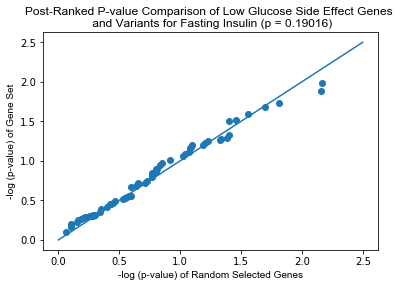

In [71]:
plt.plot([0,2.5],[0,2.5] )
plt.scatter((- np.log10(all_sorted_random[0][1].values)),( -np.log10(all_sorted_genes[2][4].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for Fasting Insulin (''p'' = 0.19016)', **csfont )
plt.savefig('low_gluc_se_fasting2.png', dpi = 600)


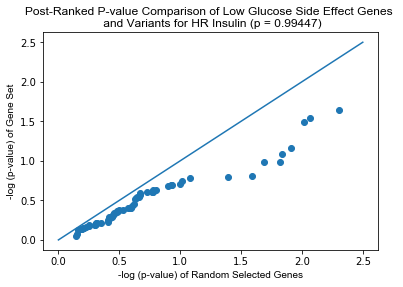

In [72]:
plt.scatter((- np.log10(all_sorted_random[1][2].values)),( -np.log10(all_sorted_genes[3][5].values)))
plt.plot([0,2.5],[0,2.5] )
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for HR Insulin (''p'' = 0.99447)', **csfont )
plt.savefig('low_gluc_se_hrinsulin2.png', dpi = 600)


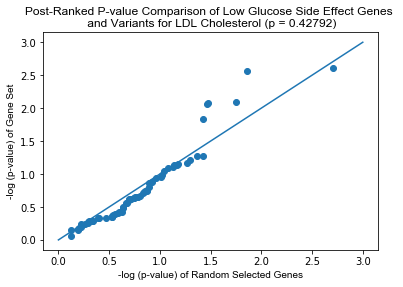

In [73]:
plt.scatter((- np.log10(all_sorted_random[2][3].values)),( -np.log10(all_sorted_genes[4][6].values)))
plt.plot([0,3],[0,3])
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for LDL Cholesterol (''p'' = 0.42792)', **csfont )
plt.savefig('low_gluc_se_ldl2.png', dpi = 600)


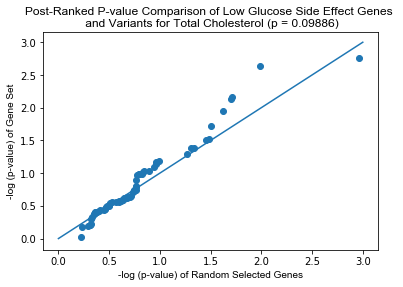

In [81]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[3][4].values)),( -np.log10(all_sorted_genes[5][7].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for Total Cholesterol (''p'' = 0.09886)', **csfont )
plt.savefig('low_gluc_se_tchol3.png', dpi = 600)

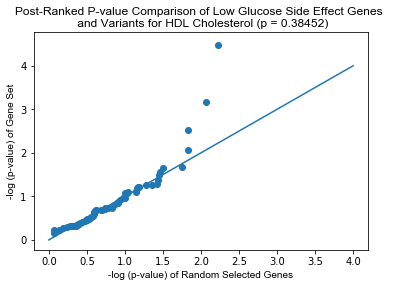

In [75]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[4][5].values)),( -np.log10(all_sorted_genes[6][8].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for HDL Cholesterol (''p'' = 0.38452)', **csfont )
plt.savefig('low_gluc_se_hdl2.png', dpi = 600)


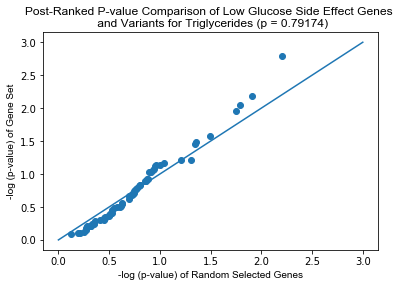

In [76]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[5][6].values)),( -np.log10(all_sorted_genes[7][9].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for Triglycerides (''p'' = 0.79174)', **csfont )
plt.savefig('low_gluc_se_tri2.png', dpi = 600)


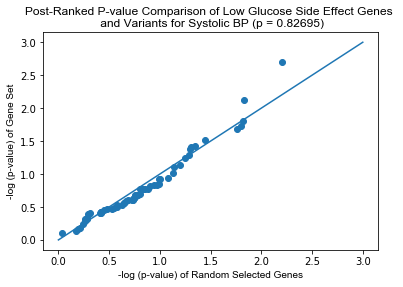

In [77]:
plt.plot([0,3],[0,3])
plt.scatter((- np.log10(all_sorted_random[6][7].values)),( -np.log10(all_sorted_genes[8][10].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for Systolic BP (''p'' = 0.82695)', **csfont )
plt.savefig('low_gluc_se_sbp2.png', dpi = 600)


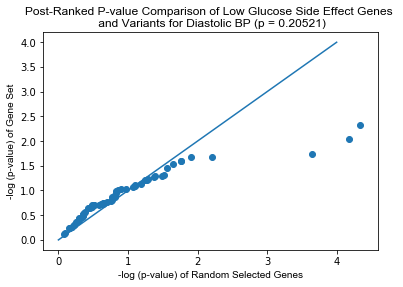

In [78]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[7][8].values)),( -np.log10(all_sorted_genes[9][11].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for Diastolic BP (''p'' = 0.20521)', **csfont )
plt.savefig('low_gluc_se_dbp2.png', dpi = 600)


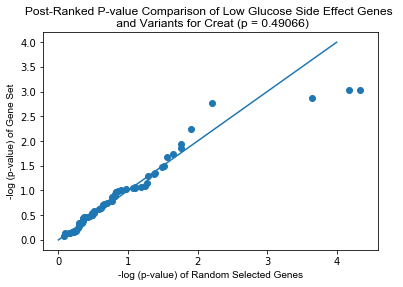

In [79]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[8][9].values)),( -np.log10(all_sorted_genes[10][12].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for Creat (''p'' = 0.49066)', **csfont )
plt.savefig('low_gluc_se_creat2.png', dpi = 600)


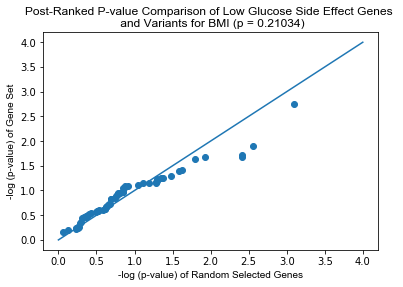

In [80]:
plt.plot([0,4],[0,4])
plt.scatter((- np.log10(all_sorted_random[9][10].values)),( -np.log10(all_sorted_genes[11][13].values)))
plt.xlabel('-log (p-value) of Random Selected Genes', **csfont)
plt.ylabel('-log (p-value) of Gene Set', **csfont)
plt.title('Post-Ranked P-value Comparison of Low Glucose Side Effect Genes \n and Variants for BMI (''p'' = 0.21034)', **csfont )
plt.savefig('low_gluc_se_bmi2.png', dpi = 600)
